In [1]:
# Function to check whether there
# exists a Hamiltonian Path or not
def Hamiltonian_path(adj, N):

    dp = [[False for i in range(1 << N)]
          for j in range(N)]

    # Set all dp[i][(1 << i)] to
    # true
    for i in range(N):
        dp[i][1 << i] = True

    # Iterate over each subset
    # of nodes
    for i in range(1 << N):
        for j in range(N):

            # If the jth nodes is included
            # in the current subset
            if ((i & (1 << j)) != 0):

                # Find K, neighbour of j
                # also present in the
                # current subset
                for k in range(N):
                    if ((i & (1 << k)) != 0 and
                        adj[k][j] == 1 and
                        j != k and
                            dp[k][i ^ (1 << j)]):

                        # Update dp[j][i]
                        # to true
                        dp[j][i] = True
                        break

    # Traverse the vertices
    for i in range(N):

        # Hamiltonian Path exists
        if (dp[i][(1 << N) - 1]):
            return True

    # Otherwise, return false
    return False

In [2]:
# Python program for solution of
# hamiltonian cycle problem

class Graph():
    def __init__(self, vertices):
        self.graph = [[0 for column in range(vertices)]
                      for row in range(vertices)]
        self.V = vertices

    ''' Check if this vertex is an adjacent vertex 
        of the previously added vertex and is not 
        included in the path earlier '''

    def isSafe(self, v, pos, path):
        # Check if current vertex and last vertex
        # in path are adjacent
        if self.graph[path[pos-1]][v] == 0:
            return False

        # Check if current vertex not already in path
        for vertex in path:
            if vertex == v:
                return False

        return True

    # A recursive utility function to solve
    # hamiltonian cycle problem
    def hamCycleUtil(self, path, pos):

        # base case: if all vertices are
        # included in the path
        if pos == self.V:
            # Last vertex must be adjacent to the
            # first vertex in path to make a cycle
            if self.graph[path[pos-1]][path[0]] == 1:
                return True
            else:
                return False

        # Try different vertices as a next candidate
        # in Hamiltonian Cycle. We don't try for 0 as
        # we included 0 as starting point in hamCycle()
        for v in range(1, self.V):

            if self.isSafe(v, pos, path) == True:

                path[pos] = v

                if self.hamCycleUtil(path, pos+1) == True:
                    return True

                # Remove current vertex if it doesn't
                # lead to a solution
                path[pos] = -1

        return False

    def hamCycle(self):
        path = [-1] * self.V

        ''' Let us put vertex 0 as the first vertex 
            in the path. If there is a Hamiltonian Cycle, 
            then the path can be started from any point 
            of the cycle as the graph is undirected '''
        path[0] = 0

        if self.hamCycleUtil(path, 1) == False:
            print("Solution does not exist\n")
            return False

        self.printSolution(path)
        return True

    def printSolution(self, path):
        print("Solution Exists: Following",
              "is one Hamiltonian Cycle")
        for vertex in path:
            print(vertex, end=" ")
        print(path[0], "\n")

In [3]:
import random

graph_dict = {}
vertices_list = [16, 18, 20]
def generate_random_graph(vertex_count):
    graph = [[0 for _ in range(vertex_count)] for _ in range(vertex_count)]
    for i in range(vertex_count):
        for j in range(i + 1, vertex_count):
            edge = random.choice([0, 1])
            graph[i][j] = edge
            graph[j][i] = edge
    return graph

for N in vertices_list:
    graph = generate_random_graph(N)
    graph_dict[N] = graph

# write into txt file
def write_to_file(graph, N):
    filename = f'graph_{N}.txt'
    with open(filename, 'w') as f:
        for i in range(N):
            for j in range(N):
                f.write(f'{graph[i][j]} ')
            f.write('\n')

# for graph in dict, write to file in txt
for N, graph in graph_dict.items():
    write_to_file(graph, N)

def read_from_file(N):
    filename = f'graph_{N}.txt'
    graph = []
    with open(filename, 'r') as f:
        for line in f:
            graph.append([int(x) for x in line.split()])
    return graph

for N in vertices_list:
    graph = read_from_file(N)
    print(graph)

[[0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0], [0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1], [0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0], [1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1], [0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0], [0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0], [0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1], [1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1], [0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0], [1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1], [1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0], [0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1], [1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1], [0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0]]
[[0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1], [0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0], [0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0], [0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [4]:
# vertices_list = [16, 18, 20]
# graphs_list = [generate_random_graph(vertices) for vertices in vertices_list]


# for graph in graph dict, find hamiltonian path
for N, graph in graph_dict.items():
    print(f'N = {N}')
    print(graph)
    print(Hamiltonian_path(graph, N))
    
# for graph in graph dict, find hamiltonian path using backtracking
for N, graph in graph_dict.items():
    print(f'N = {N}')
    print(graph)
    g1 = Graph(N)
    g1.graph = graph
    g1.hamCycle()

N = 16
[[0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0], [0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1], [0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0], [1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1], [0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0], [0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0], [0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1], [1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1], [0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0], [1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1], [1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0], [0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1], [1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1], [0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0]]
True
N = 18
[[0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1], [0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0], [0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0], [0, 0, 1, 0

Solution Exists: Following is one Hamiltonian Cycle
0 3 2 1 4 5 6 7 10 8 9 11 15 13 12 14 0 

Solution Exists: Following is one Hamiltonian Cycle
0 4 1 2 3 7 5 9 8 10 6 11 15 13 17 12 14 16 0 

Solution Exists: Following is one Hamiltonian Cycle
0 1 2 3 4 8 6 5 12 9 11 15 7 13 16 14 18 17 10 19 0 

Solution Exists: Following is one Hamiltonian Cycle
0 3 2 1 4 5 6 7 10 8 9 11 15 13 12 14 0 

Solution Exists: Following is one Hamiltonian Cycle
0 3 2 1 4 5 6 7 10 8 9 11 15 13 12 14 0 

Solution Exists: Following is one Hamiltonian Cycle
0 3 2 1 4 5 6 7 10 8 9 11 15 13 12 14 0 

Solution Exists: Following is one Hamiltonian Cycle
0 3 2 1 4 5 6 7 10 8 9 11 15 13 12 14 0 

Solution Exists: Following is one Hamiltonian Cycle
0 4 1 2 3 7 5 9 8 10 6 11 15 13 17 12 14 16 0 

Solution Exists: Following is one Hamiltonian Cycle
0 4 1 2 3 7 5 9 8 10 6 11 15 13 17 12 14 16 0 

Solution Exists: Following is one Hamiltonian Cycle
0 4 1 2 3 7 5 9 8 10 6 11 15 13 17 12 14 16 0 

Solution Exists: Followi

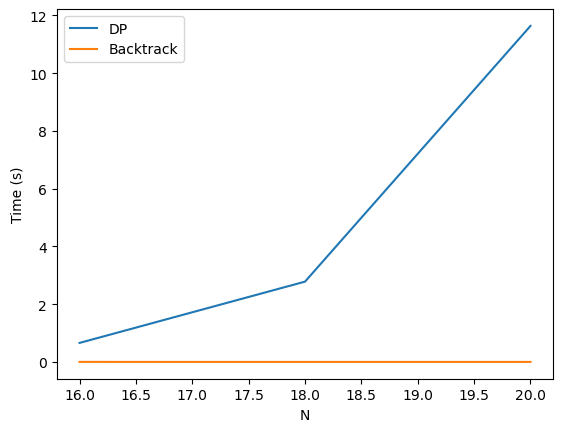

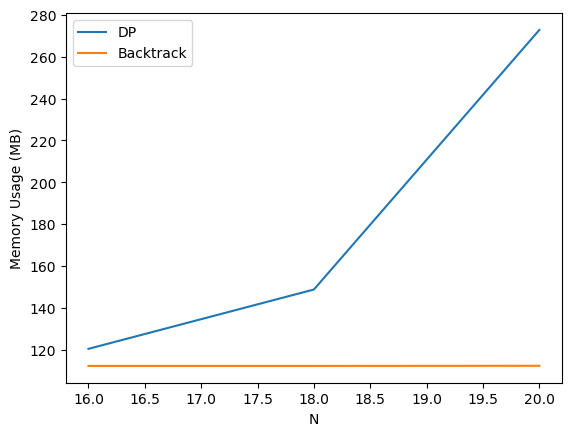

In [5]:
import time
import random
import matplotlib.pyplot as plt
from memory_profiler import memory_usage

# Kode untuk kelas HamiltonianCycleDP dan HamiltonianCycleBacktrack di sini

def test_algorithm(graph_dictionary, algorithm):
    results = {}
    for N, graph in graph_dictionary.items():
        start_time = time.time()
        if algorithm == 'dp':
            result = Hamiltonian_path(graph, N)
        elif algorithm == 'backtrack':
            g1 = Graph(N)
            g1.graph = graph
            result = g1.hamCycle()
        end_time = time.time()
        results[N] = (result, end_time - start_time)
    return results

def memusage_algorithm(graph_dictionary, algorithm):
    results = {}
    for N, graph in graph_dictionary.items():
        if algorithm == 'dp':
            result = memory_usage((Hamiltonian_path, (graph, N)))
        elif algorithm == 'backtrack':
            g1 = Graph(N)
            g1.graph = graph
            result = memory_usage((g1.hamCycle, ()))
        results[N] = result
    return results

time_dp = test_algorithm(graph_dict, 'dp')
time_backtrack = test_algorithm(graph_dict, 'backtrack')

memusage_dp = memusage_algorithm(graph_dict, 'dp')
memusage_backtrack = memusage_algorithm(graph_dict, 'backtrack')

def plot_time_comparison(dp_results, backtrack_results):
    N = list(dp_results.keys())
    dp_time = [dp_results[n][1] for n in N]
    backtrack_time = [backtrack_results[n][1] for n in N]
    plt.plot(N, dp_time, label='DP')
    plt.plot(N, backtrack_time, label='Backtrack')
    plt.xlabel('N')
    plt.ylabel('Time (s)')
    plt.legend()
    plt.show()
    
def plot_memory_comparison(dp_results, backtrack_results):
    N = list(dp_results.keys())
    dp_memory = [max(dp_results[n]) for n in N]
    backtrack_memory = [max(backtrack_results[n]) for n in N]
    plt.plot(N, dp_memory, label='DP')
    plt.plot(N, backtrack_memory, label='Backtrack')
    plt.xlabel('N')
    plt.ylabel('Memory Usage (MB)')
    plt.legend()
    plt.show()
    
plot_time_comparison(time_dp, time_backtrack)
plot_memory_comparison(memusage_dp, memusage_backtrack)